# Advanced Pairs Trading : Kalman Filters

## Import library

In [1]:
import sys
sys.path.append('../../')

In [2]:
from util.load_data import *
from config.constants import *
import statsmodels.api as sm
import quantstats as qs
import numpy as np
from pykalman import KalmanFilter
import pandas as pd
import matplotlib.pyplot as plt
from Kalman_Filter import Kalman_Filter

## Getting the Data

In [3]:
XAUUSD = load_data()

## Class Kalman Filter

## Currency_Pair

In [4]:
Currency_Pair = 'USDCAD'

## TF D1

In [5]:
TF = 'D1'

In [6]:
data_1 = XAUUSD[TF]

In [7]:
data_2 = pd.read_csv(
    PATH_DATA + f'/{Currency_Pair}/{Currency_Pair}_{TF} - {Currency_Pair}_{TF}' + '.csv', index_col='Time', parse_dates=True)

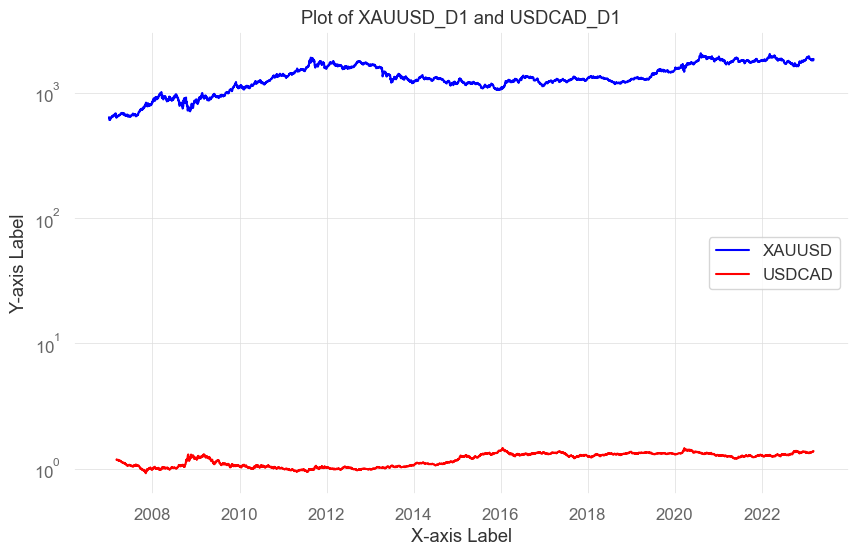

In [8]:
plt.figure(figsize=(10, 6))

# พล็อตข้อมูลใน data_1
plt.plot(data_1.index, data_1['Close'], label= 'XAUUSD', color='blue')
plt.yscale('log')  # ใช้ค่าลอการิทึมในแกน y

# พล็อตข้อมูลใน data_2
plt.plot(data_2.index, data_2['Close'], label=f'{Currency_Pair}', color='red')
plt.yscale('log')  # ใช้ค่าลอการิทึมในแกน y

# เพิ่มคำอธิบายแต่ละแท่งของกราฟ
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title(f'Plot of XAUUSD_{TF} and {Currency_Pair}_{TF}')
plt.legend()

# แสดงกราฟ
plt.show()

In [9]:
KF = Kalman_Filter(data_1, data_2)

In [10]:
KF.Stat()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Close   R-squared (uncentered):                   0.943
Model:                            OLS   Adj. R-squared (uncentered):              0.943
Method:                 Least Squares   F-statistic:                          8.231e+04
Date:                Sat, 02 Mar 2024   Prob (F-statistic):                        0.00
Time:                        17:40:11   Log-Likelihood:                         -36213.
No. Observations:                5011   AIC:                                  7.243e+04
Df Residuals:                    5010   BIC:                                  7.243e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Close       1135.1924      3.957    286.892      0.000    1127.435    1142.950
==============================================================================
Omnibus:                     1052.976   Durbin-Watson:                   0.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              217.902
Skew:                           0.139   Prob(JB):                     4.82e-48
Kurtosis:                       2.017   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
result = KF.Run()

### Save Result Backtest 

In [12]:
result
data = result[['strategy', 'stock1_signal', 'stock2_signal']].copy()

In [13]:
filename = f'{Currency_Pair}_{TF}.csv'

In [14]:
data.to_csv(
    f'../../out/Pairs_Trading/Kalman Filter/Backtest/{filename}', index=True)

### Reports

                           Strategy
-------------------------  ----------
Start Period               2007-03-05
End Period                 2023-03-10
Risk-Free Rate             0.0%
Time in Market             100.0%

Cumulative Return          -100.0%
CAGR﹪                     -37.28%

Sharpe                     -1.29
Prob. Sharpe Ratio         0.0%
Smart Sharpe               -1.08
Sortino                    -1.38
Smart Sortino              -1.16
Sortino/√2                 -0.98
Smart Sortino/√2           -0.82
Omega                      0.69

Max Drawdown               -100.0%
Longest DD Days            5849
Volatility (ann.)          36.5%
Calmar                     -0.37
Skew                       -6.54
Kurtosis                   59.59

Expected Daily %           -0.22%
Expected Monthly %         -5.45%
Expected Yearly %          -47.1%
Kelly Criterion            -22.54%
Risk of Ruin               0.0%
Daily Value-at-Risk        -3.97%
Expected Shortfall (cVaR)  -3.97%

Max Consecut

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2007-03-06,2020-03-19,2023-03-10,5849,-99.998461,-99.998328


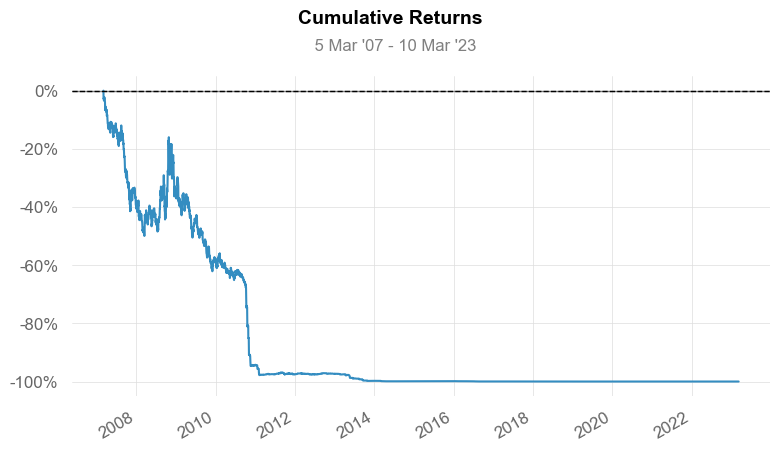

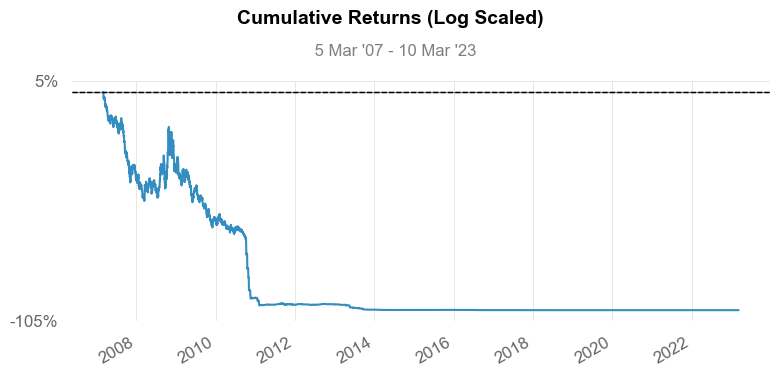

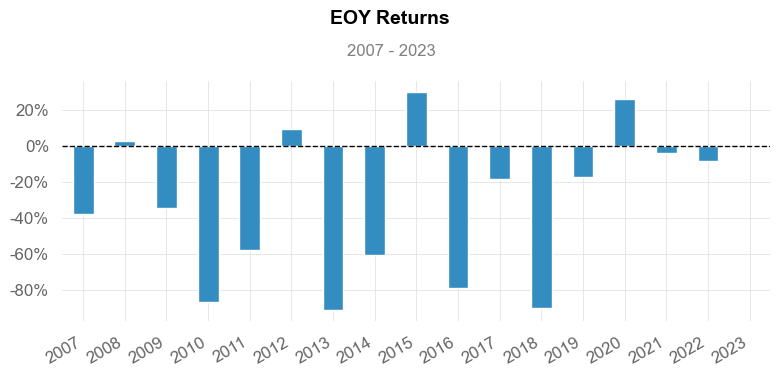

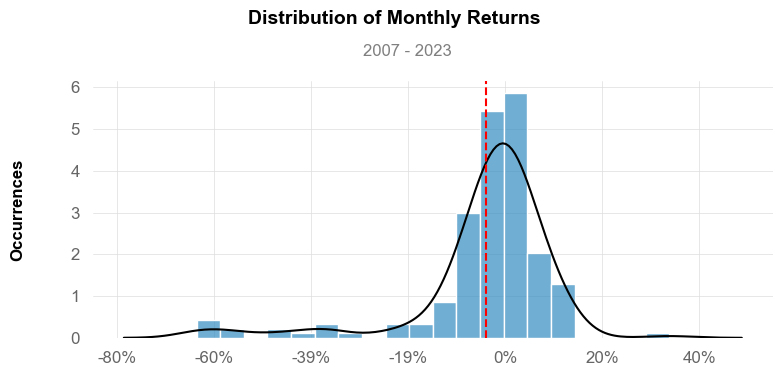

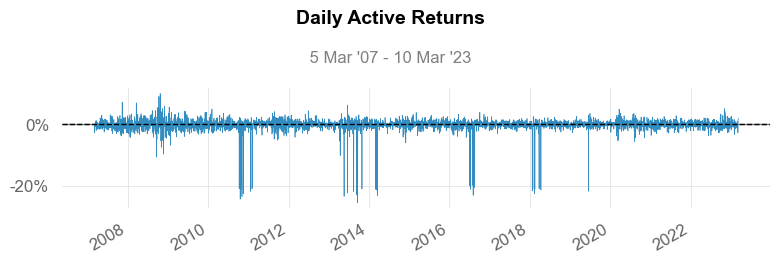

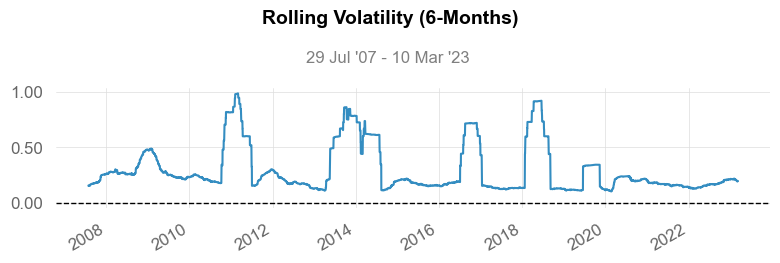

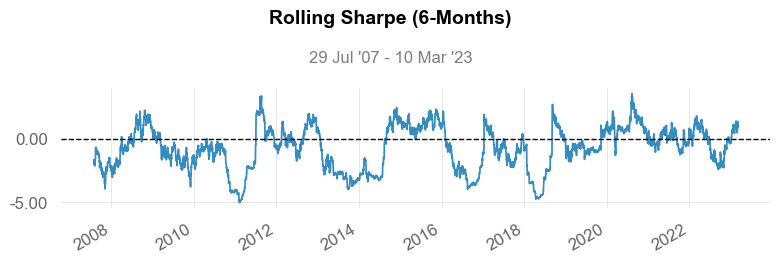

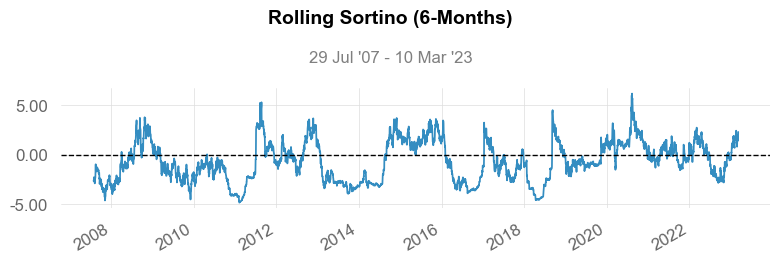

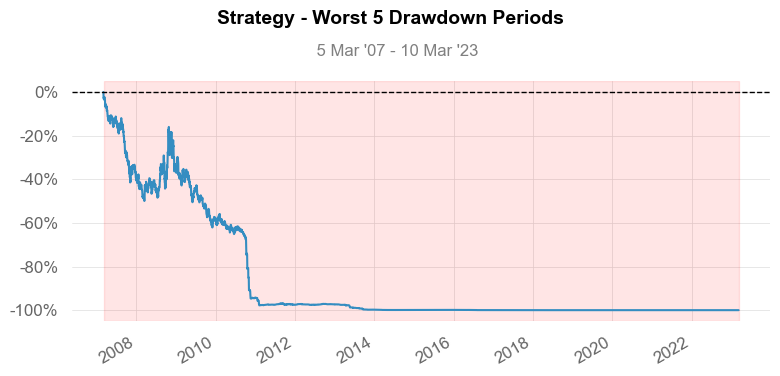

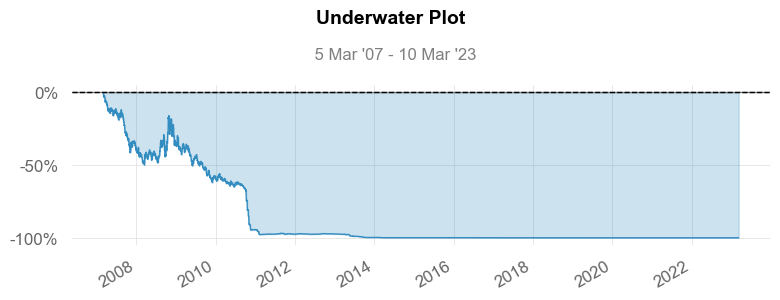

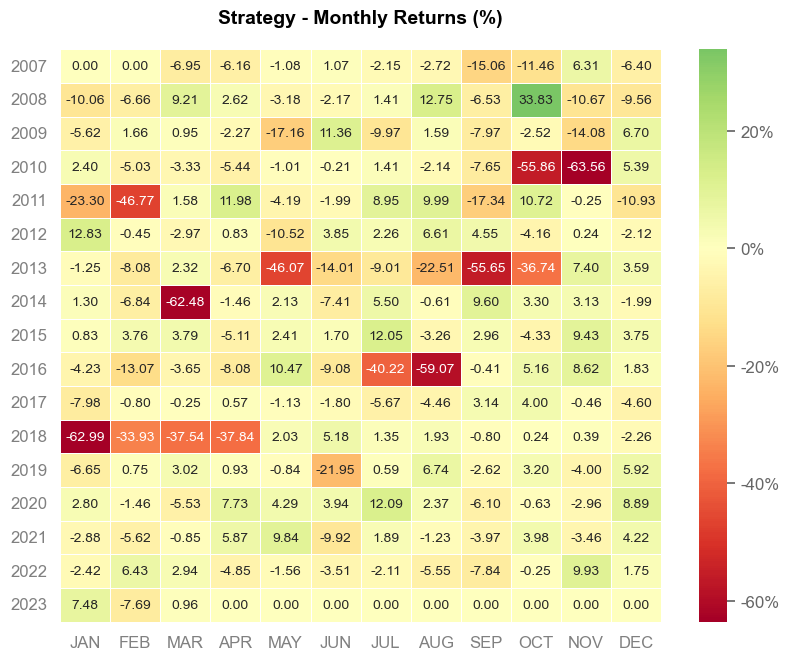

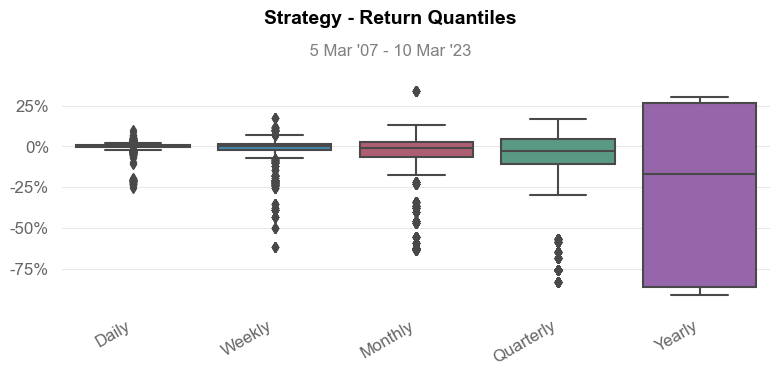

In [15]:
qs.reports.full(result['returns_all'].resample('D').last().dropna())

## TF H4

In [16]:
TF = 'H4'

In [17]:
data_1 = XAUUSD[TF]

In [18]:
data_2 = pd.read_csv(
    PATH_DATA + f'/{Currency_Pair}/{Currency_Pair}_{TF} - {Currency_Pair}_{TF}' + '.csv', index_col='Time', parse_dates=True)

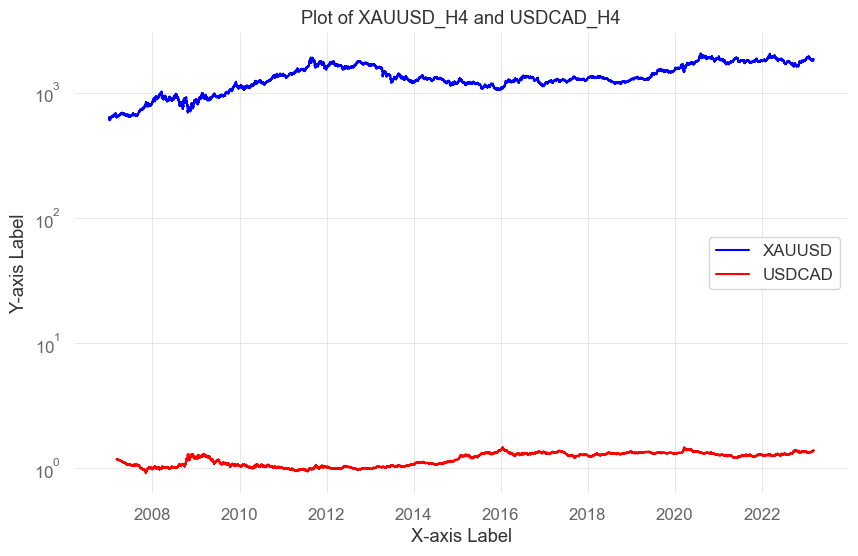

In [19]:
plt.figure(figsize=(10, 6))

# พล็อตข้อมูลใน data_1
plt.plot(data_1.index, data_1['Close'], label= 'XAUUSD', color='blue')
plt.yscale('log')  # ใช้ค่าลอการิทึมในแกน y

# พล็อตข้อมูลใน data_2
plt.plot(data_2.index, data_2['Close'], label=f'{Currency_Pair}', color='red')
plt.yscale('log')  # ใช้ค่าลอการิทึมในแกน y

# เพิ่มคำอธิบายแต่ละแท่งของกราฟ
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title(f'Plot of XAUUSD_{TF} and {Currency_Pair}_{TF}')
plt.legend()

# แสดงกราฟ
plt.show()

In [20]:
KF = Kalman_Filter(data_1, data_2)

In [21]:
KF.Stat()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Close   R-squared (uncentered):                   0.943
Model:                            OLS   Adj. R-squared (uncentered):              0.943
Method:                 Least Squares   F-statistic:                          4.240e+05
Date:                Sat, 02 Mar 2024   Prob (F-statistic):                        0.00
Time:                        17:41:59   Log-Likelihood:                     -1.8679e+05
No. Observations:               25845   AIC:                                  3.736e+05
Df Residuals:                   25844   BIC:                                  3.736e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Close       1135.0072      1.743    651.139      0.000    1131.591    1138.424
==============================================================================
Omnibus:                     5495.204   Durbin-Watson:                   0.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1121.414
Skew:                           0.137   Prob(JB):                    3.08e-244
Kurtosis:                       2.017   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
result = KF.Run()

### Save Result Backtest 

In [23]:
result
data = result[['strategy', 'stock1_signal', 'stock2_signal']].copy()

In [24]:
filename = f'{Currency_Pair}_{TF}.csv'

In [25]:
data.to_csv(
    f'../../out/Pairs_Trading/Kalman Filter/Backtest/{filename}', index=True)

### Reports

                           Strategy
-------------------------  ----------
Start Period               2007-03-05
End Period                 2023-03-10
Risk-Free Rate             0.0%
Time in Market             100.0%

Cumulative Return          -96.91%
CAGR﹪                     -13.91%

Sharpe                     -0.89
Prob. Sharpe Ratio         0.0%
Smart Sharpe               -0.79
Sortino                    -0.9
Smart Sortino              -0.8
Sortino/√2                 -0.64
Smart Sortino/√2           -0.56
Omega                      0.6

Max Drawdown               -97.66%
Longest DD Days            5597
Volatility (ann.)          17.67%
Calmar                     -0.14
Skew                       -16.76
Kurtosis                   302.01

Expected Daily %           -0.07%
Expected Monthly %         -1.78%
Expected Yearly %          -18.49%
Kelly Criterion            -32.73%
Risk of Ruin               0.0%
Daily Value-at-Risk        -1.89%
Expected Shortfall (cVaR)  -1.89%

Max Consecu

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2007-11-13,2019-06-14,2023-03-10,5597,-97.664906,-97.644263
2,2007-03-08,2007-06-22,2007-08-15,161,-3.599317,-3.386090
3,2007-10-16,2007-11-06,2007-11-06,22,-1.622080,-1.469307
4,2007-11-08,2007-11-08,2007-11-11,4,-1.283167,-0.910494
5,2007-08-22,2007-08-26,2007-08-28,7,-0.570570,-0.487049


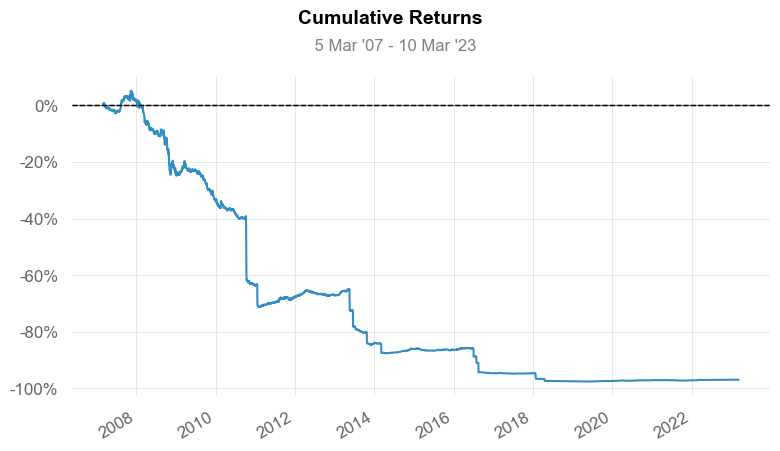

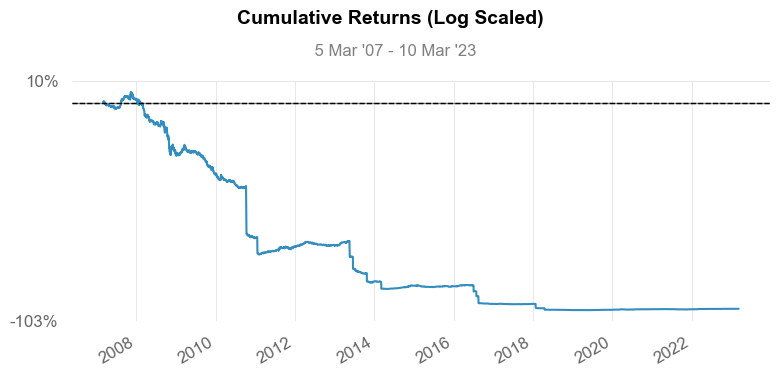

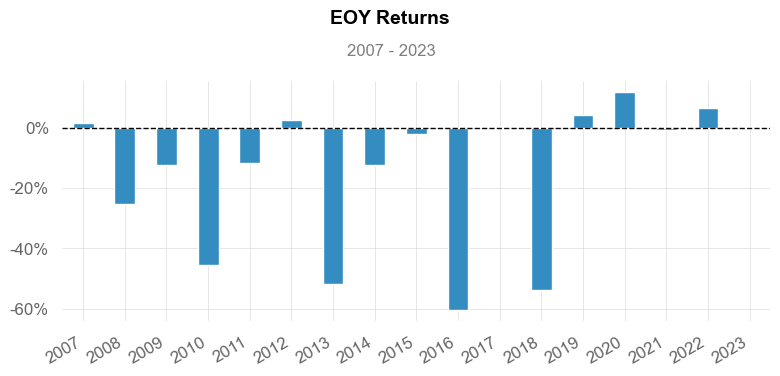

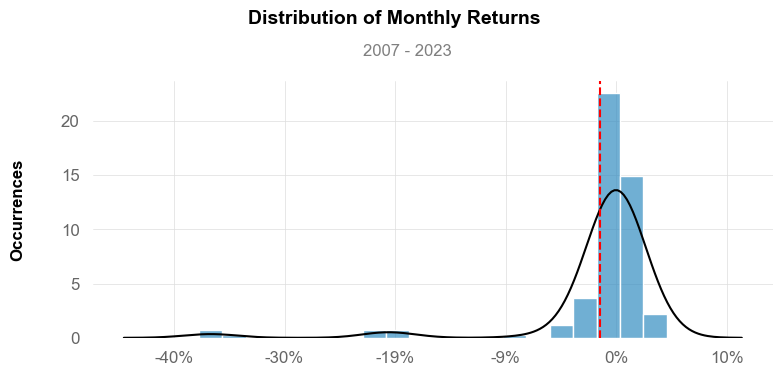

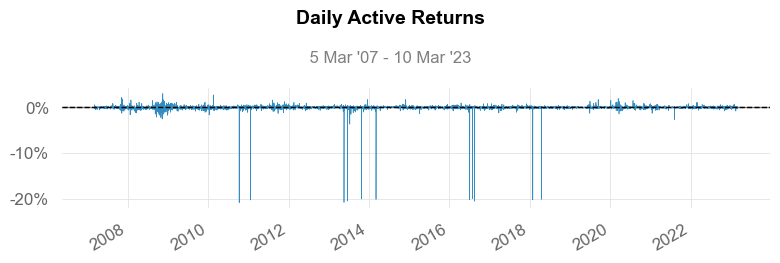

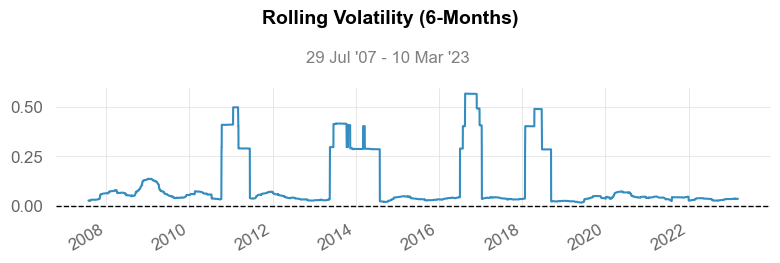

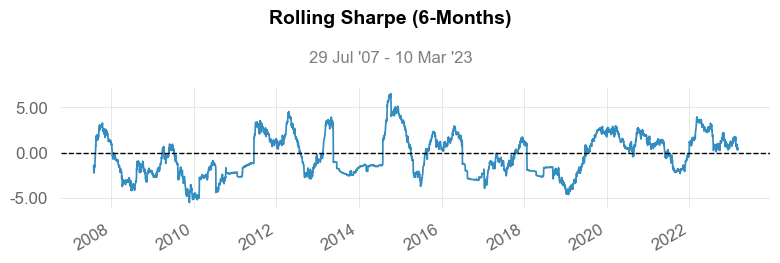

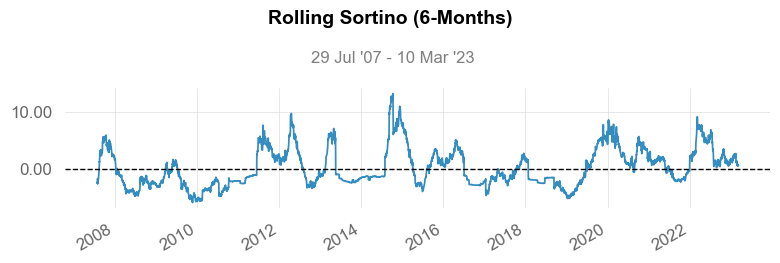

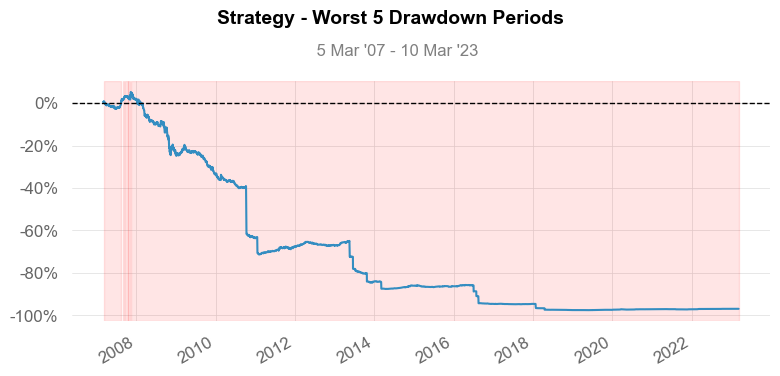

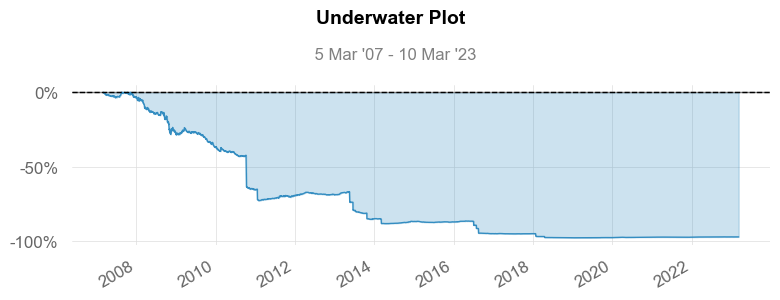

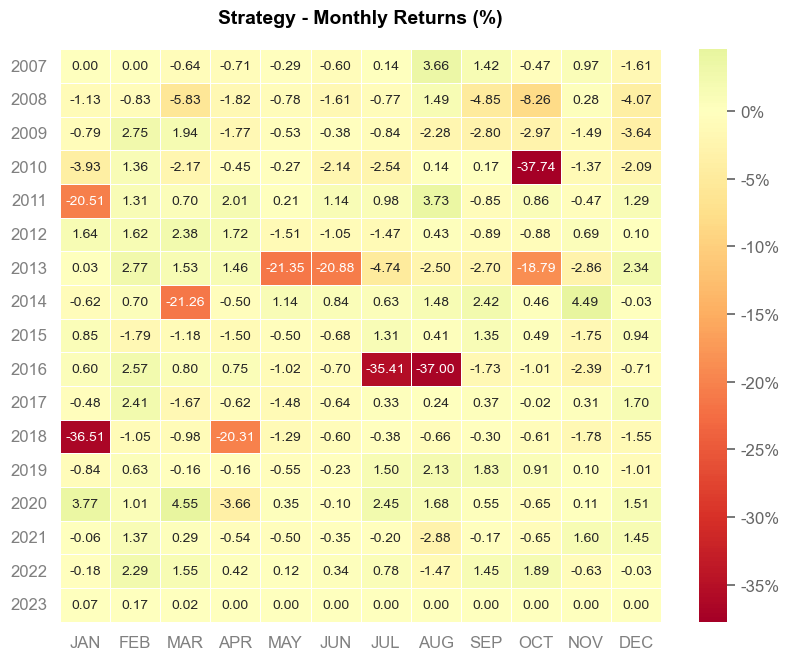

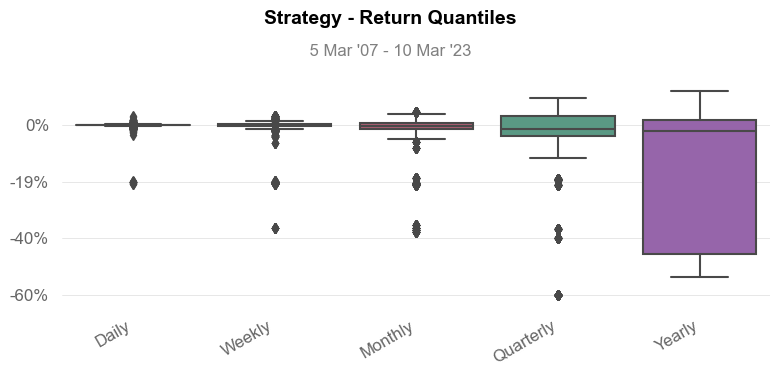

In [26]:
qs.reports.full(result['returns_all'].resample('D').last().dropna())

## TF H1

In [27]:
TF = 'H1'

In [28]:
data_1 = XAUUSD[TF]

In [29]:
data_2 = pd.read_csv(
    PATH_DATA + f'/{Currency_Pair}/{Currency_Pair}_{TF} - {Currency_Pair}_{TF}' + '.csv', index_col='Time', parse_dates=True)

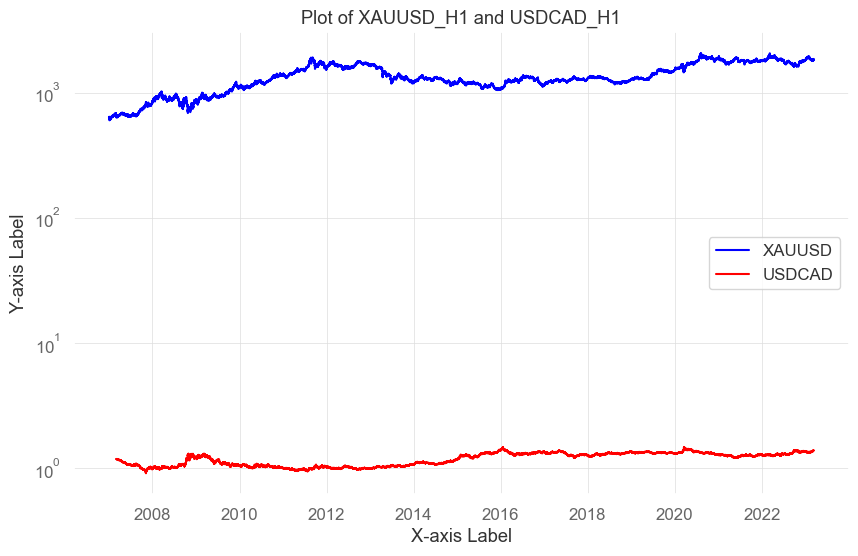

In [30]:
plt.figure(figsize=(10, 6))

# พล็อตข้อมูลใน data_1
plt.plot(data_1.index, data_1['Close'], label= 'XAUUSD', color='blue')
plt.yscale('log')  # ใช้ค่าลอการิทึมในแกน y

# พล็อตข้อมูลใน data_2
plt.plot(data_2.index, data_2['Close'], label=f'{Currency_Pair}', color='red')
plt.yscale('log')  # ใช้ค่าลอการิทึมในแกน y

# เพิ่มคำอธิบายแต่ละแท่งของกราฟ
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title(f'Plot of XAUUSD_{TF} and {Currency_Pair}_{TF}')
plt.legend()

# แสดงกราฟ
plt.show()

In [31]:
KF = Kalman_Filter(data_1, data_2)

In [32]:
KF.Stat()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Close   R-squared (uncentered):                   0.943
Model:                            OLS   Adj. R-squared (uncentered):              0.943
Method:                 Least Squares   F-statistic:                          1.640e+06
Date:                Sat, 02 Mar 2024   Prob (F-statistic):                        0.00
Time:                        17:46:57   Log-Likelihood:                     -7.2279e+05
No. Observations:              100007   AIC:                                  1.446e+06
Df Residuals:                  100006   BIC:                                  1.446e+06
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Close       1134.9340      0.886   1280.611      0.000    1133.197    1136.671
==============================================================================
Omnibus:                    21359.751   Durbin-Watson:                   0.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4340.904
Skew:                           0.136   Prob(JB):                         0.00
Kurtosis:                       2.016   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
result = KF.Run()

### Save Result Backtest 

In [34]:
result
data = result[['strategy', 'stock1_signal', 'stock2_signal']].copy()

In [35]:
filename = f'{Currency_Pair}_{TF}.csv'

In [36]:
data.to_csv(
    f'../../out/Pairs_Trading/Kalman Filter/Backtest/{filename}', index=True)

### Reports

                           Strategy
-------------------------  ----------
Start Period               2007-03-05
End Period                 2023-03-10
Risk-Free Rate             0.0%
Time in Market             100.0%

Cumulative Return          -73.91%
CAGR﹪                     -5.62%

Sharpe                     -0.52
Prob. Sharpe Ratio         0.0%
Smart Sharpe               -0.45
Sortino                    -0.53
Smart Sortino              -0.46
Sortino/√2                 -0.38
Smart Sortino/√2           -0.32
Omega                      0.73

Max Drawdown               -82.19%
Longest DD Days            5587
Volatility (ann.)          11.47%
Calmar                     -0.07
Skew                       -25.69
Kurtosis                   711.65

Expected Daily %           -0.03%
Expected Monthly %         -0.69%
Expected Yearly %          -7.6%
Kelly Criterion            -18.45%
Risk of Ruin               0.0%
Daily Value-at-Risk        -1.21%
Expected Shortfall (cVaR)  -1.21%

Max Consecu

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2007-11-23,2019-03-07,2023-03-10,5587,-82.190055,-82.146348
2,2007-03-13,2007-06-22,2007-08-12,153,-1.655153,-1.567873
3,2007-09-19,2007-10-18,2007-11-11,54,-1.551679,-1.498616
4,2007-11-13,2007-11-18,2007-11-21,9,-0.732108,-0.489114
5,2007-08-30,2007-08-31,2007-09-05,7,-0.421985,-0.340242


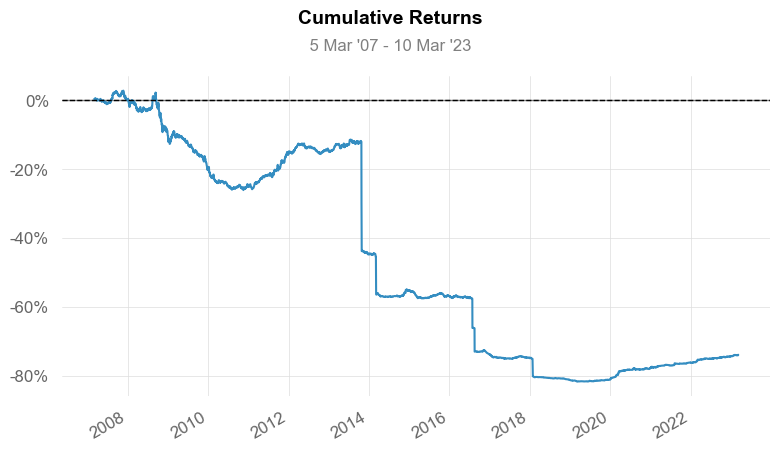

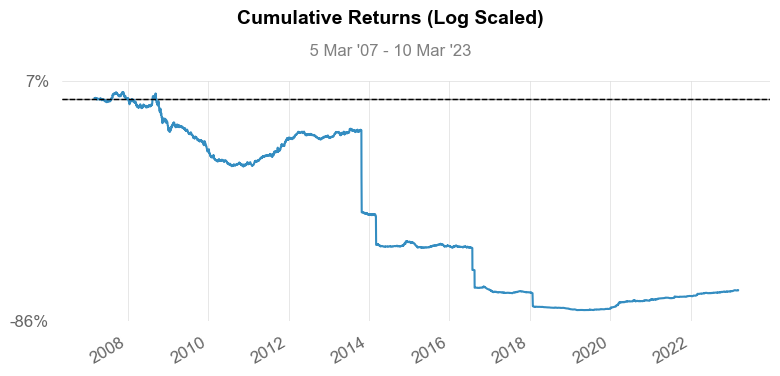

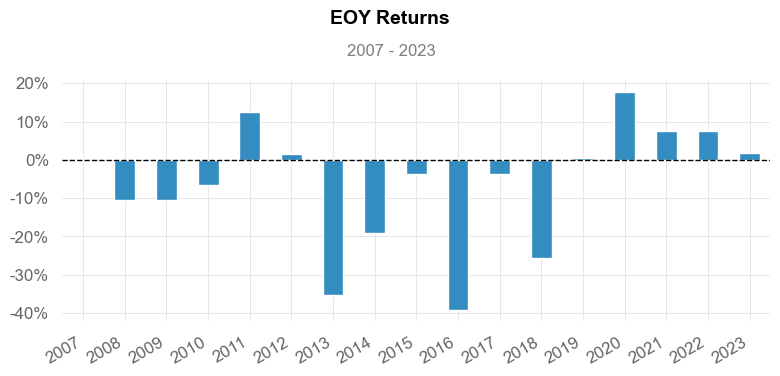

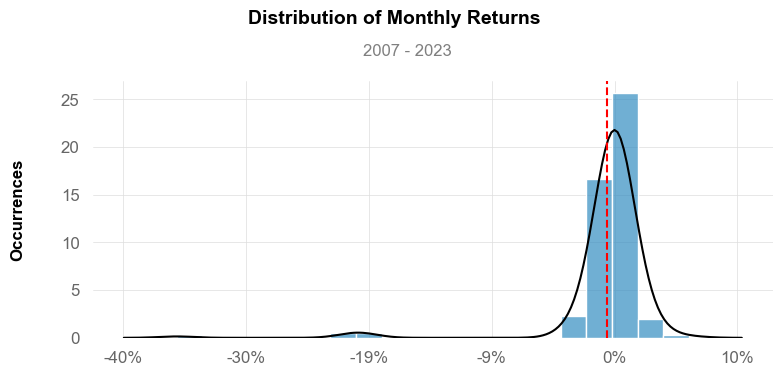

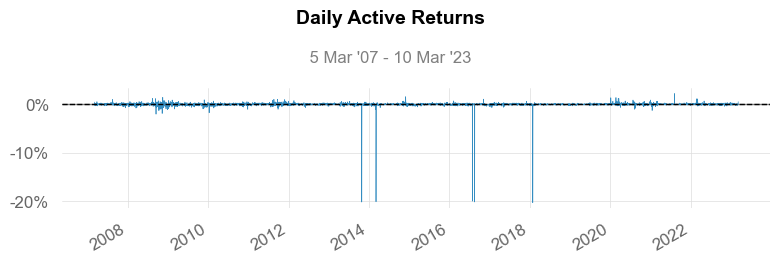

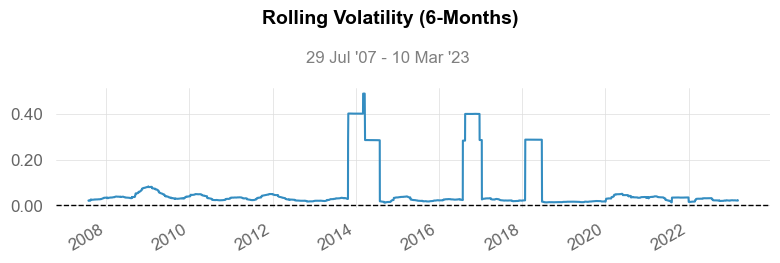

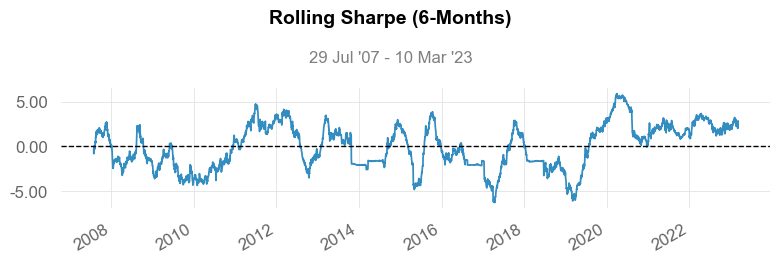

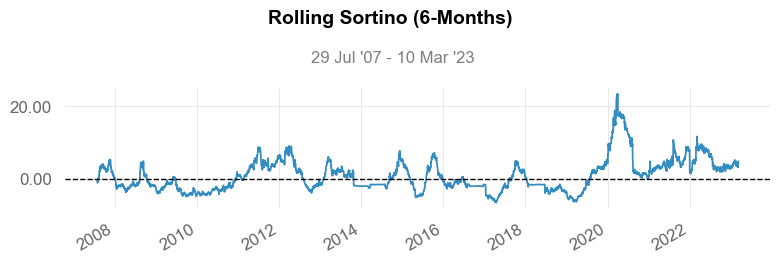

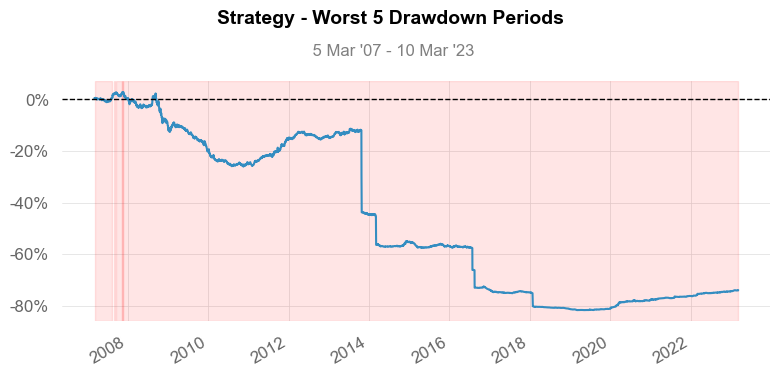

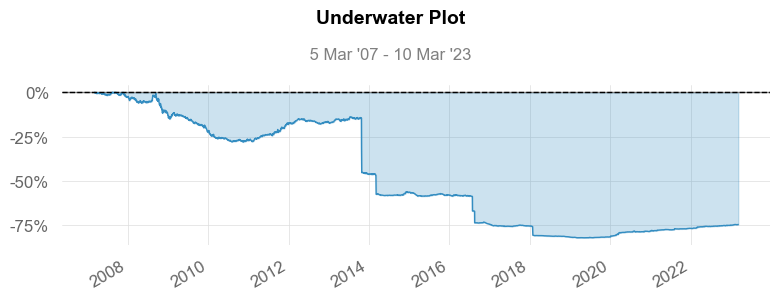

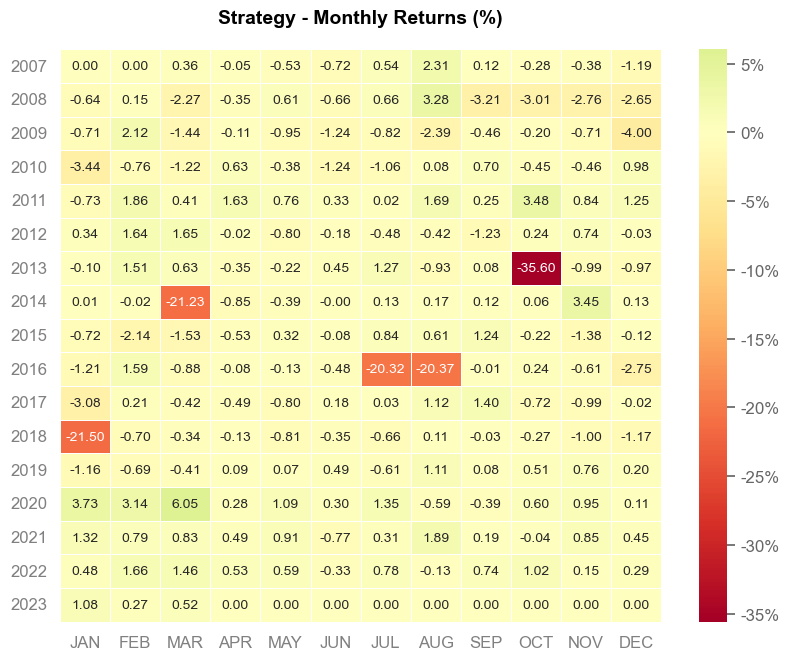

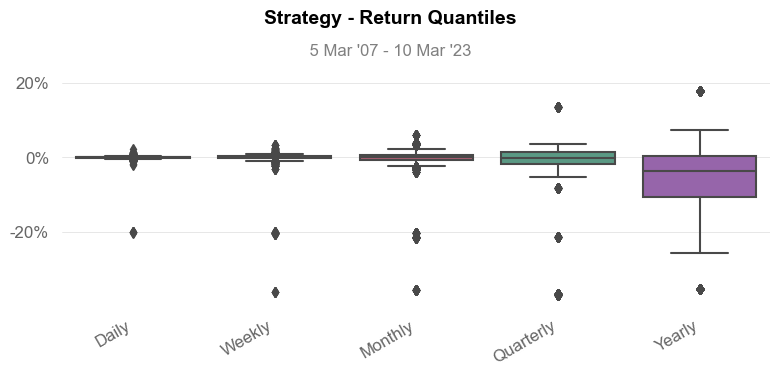

In [37]:
qs.reports.full(result['returns_all'].resample('D').last().dropna())

## TF H30

In [38]:
TF = 'M30'

In [39]:
data_1 = XAUUSD[TF]

In [40]:
data_2 = pd.read_csv(
    PATH_DATA + f'/{Currency_Pair}/{Currency_Pair}_{TF} - {Currency_Pair}_{TF}' + '.csv', index_col='Time', parse_dates=True)

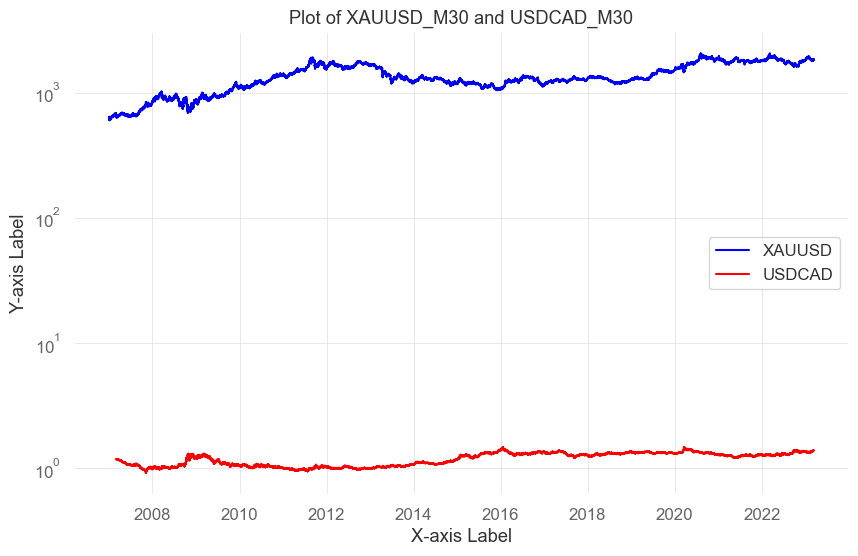

In [41]:
plt.figure(figsize=(10, 6))

# พล็อตข้อมูลใน data_1
plt.plot(data_1.index, data_1['Close'], label= 'XAUUSD', color='blue')
plt.yscale('log')  # ใช้ค่าลอการิทึมในแกน y

# พล็อตข้อมูลใน data_2
plt.plot(data_2.index, data_2['Close'], label=f'{Currency_Pair}', color='red')
plt.yscale('log')  # ใช้ค่าลอการิทึมในแกน y

# เพิ่มคำอธิบายแต่ละแท่งของกราฟ
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title(f'Plot of XAUUSD_{TF} and {Currency_Pair}_{TF}')
plt.legend()

# แสดงกราฟ
plt.show()

In [42]:
KF = Kalman_Filter(data_1, data_2)

In [43]:
KF.Stat()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Close   R-squared (uncentered):                   0.943
Model:                            OLS   Adj. R-squared (uncentered):              0.943
Method:                 Least Squares   F-statistic:                          3.280e+06
Date:                Sat, 02 Mar 2024   Prob (F-statistic):                        0.00
Time:                        18:01:57   Log-Likelihood:                     -1.4455e+06
No. Observations:              200000   AIC:                                  2.891e+06
Df Residuals:                  199999   BIC:                                  2.891e+06
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Close       1134.9339      0.627   1811.043      0.000    1133.706    1136.162
==============================================================================
Omnibus:                    42731.697   Durbin-Watson:                   0.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8681.655
Skew:                           0.136   Prob(JB):                         0.00
Kurtosis:                       2.016   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
result = KF.Run()

### Save Result Backtest 

In [45]:
result
data = result[['strategy', 'stock1_signal', 'stock2_signal']].copy()

In [46]:
filename = f'{Currency_Pair}_{TF}.csv'

In [47]:
data.to_csv(
    f'../../out/Pairs_Trading/Kalman Filter/Backtest/{filename}', index=True)

### Reports

                           Strategy
-------------------------  ----------
Start Period               2007-03-05
End Period                 2023-03-10
Risk-Free Rate             0.0%
Time in Market             100.0%

Cumulative Return          -80.68%
CAGR﹪                     -6.84%

Sharpe                     -0.57
Prob. Sharpe Ratio         0.0%
Smart Sharpe               -0.44
Sortino                    -0.57
Smart Sortino              -0.44
Sortino/√2                 -0.4
Smart Sortino/√2           -0.31
Omega                      0.61

Max Drawdown               -83.45%
Longest DD Days            5294
Volatility (ann.)          12.89%
Calmar                     -0.08
Skew                       -24.02
Kurtosis                   590.53

Expected Daily %           -0.03%
Expected Monthly %         -0.85%
Expected Yearly %          -9.22%
Kelly Criterion            -33.23%
Risk of Ruin               0.0%
Daily Value-at-Risk        -1.36%
Expected Shortfall (cVaR)  -1.36%

Max Consecu

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2008-09-11,2018-02-11,2023-03-10,5294,-83.454731,-83.269818
2,2007-11-21,2008-05-18,2008-08-13,267,-2.369412,-2.314032
3,2007-08-30,2007-10-29,2007-11-15,78,-1.123148,-1.087901
4,2007-03-06,2007-04-13,2007-05-28,84,-1.115072,-1.088014
5,2008-08-18,2008-08-22,2008-09-01,15,-0.750865,-0.682447


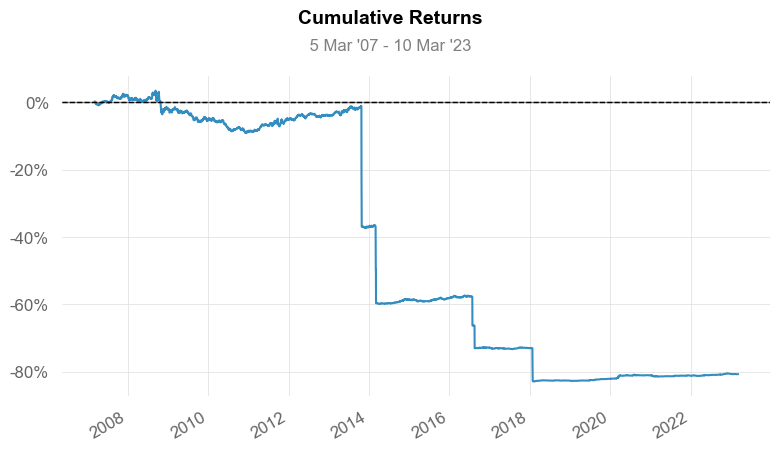

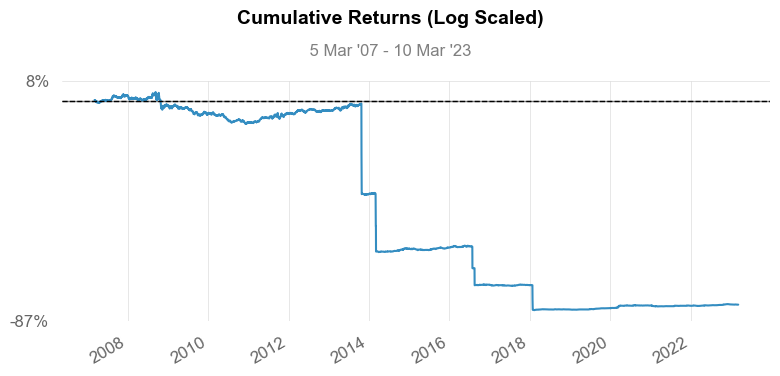

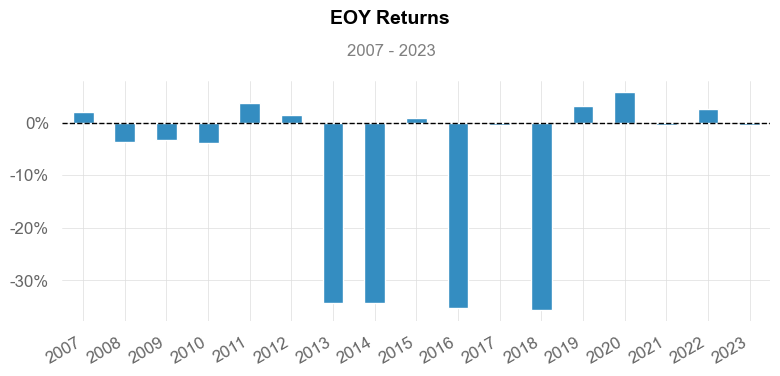

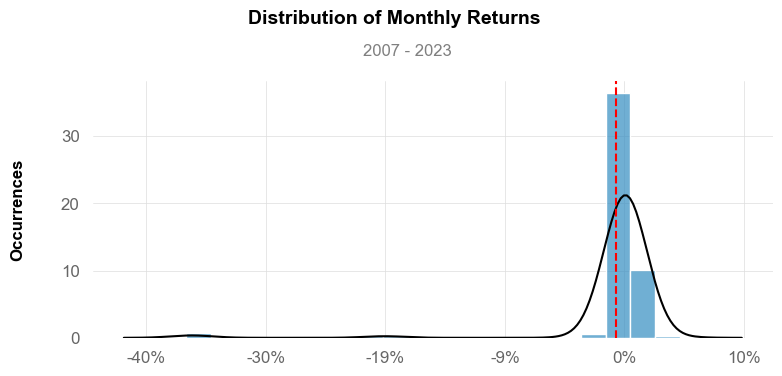

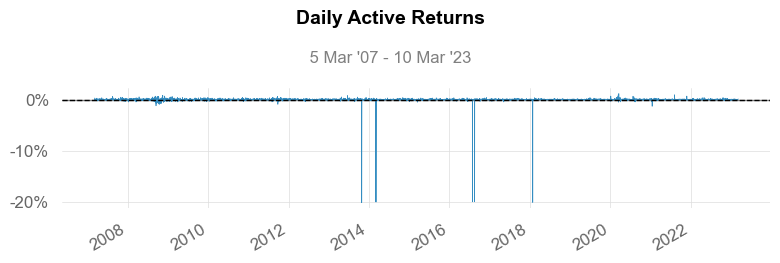

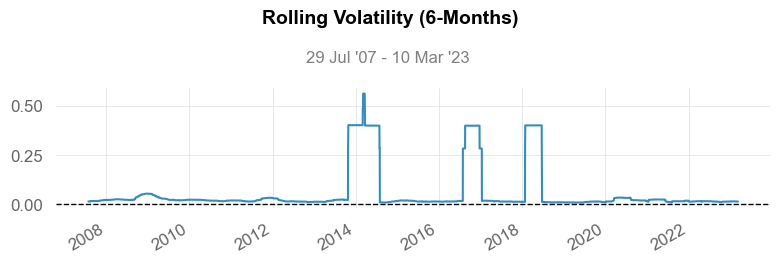

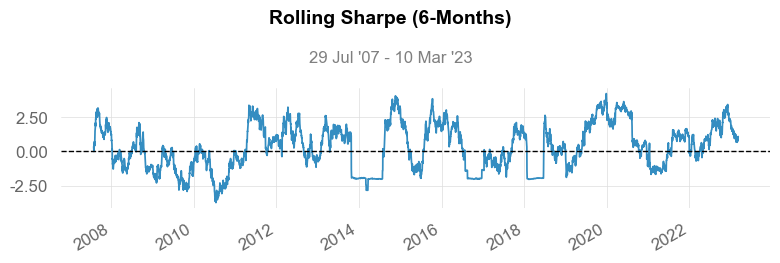

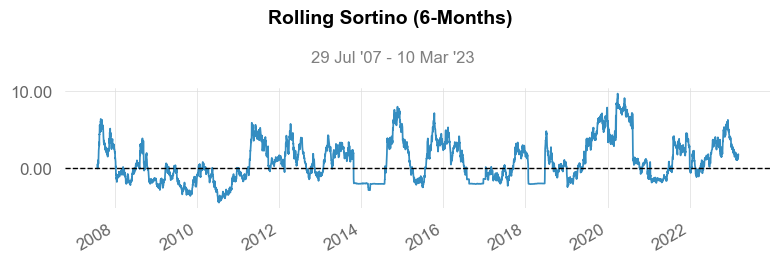

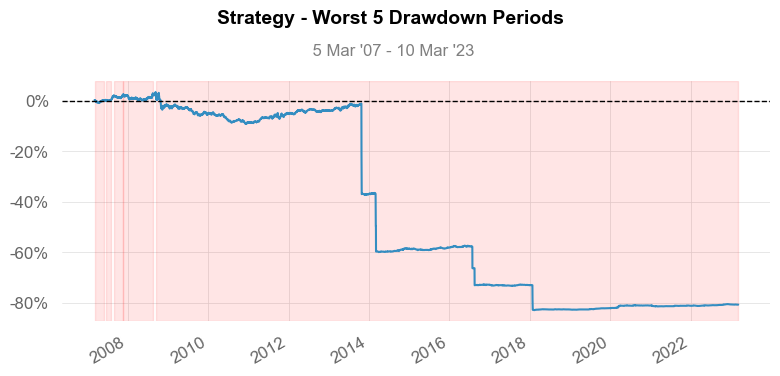

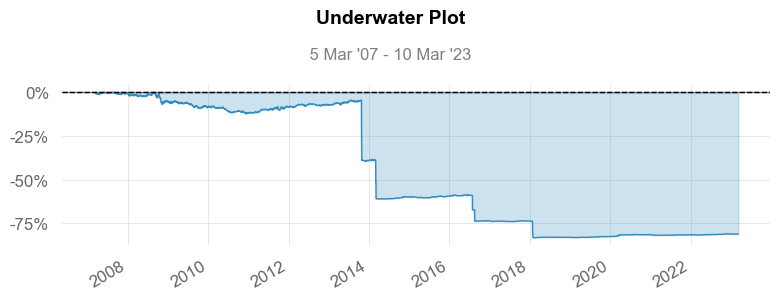

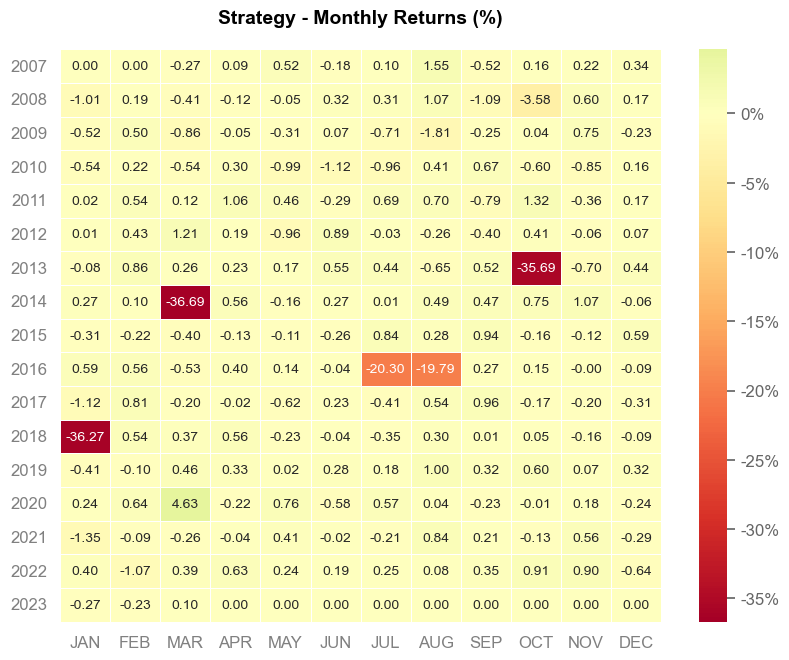

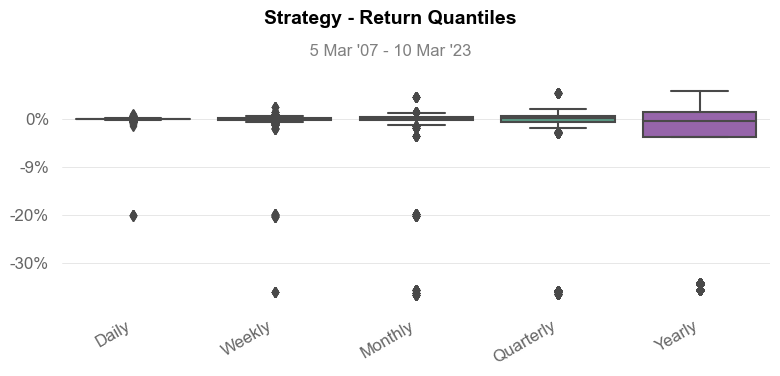

In [48]:
qs.reports.full(result['returns_all'].resample('D').last().dropna())